Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import classification_report as c_rep

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

Подготовьте датасет к обучению моделей.

In [2]:
heart_str = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/09.Ansambling/heart.csv'

In [3]:
heart_data = pd.read_csv(heart_str)

In [4]:
heart_data_copy = heart_data.copy()

In [5]:
heart_data_copy.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
for col in heart_data_copy.columns:
  print(col, ':', heart_data_copy[col].unique())

Age : [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex : ['M' 'F']
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
RestingBP : [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol : [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 2

In [7]:
heart_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
def four_group_classifier(data, col_name, int1, int2, int3):
  if(data[col_name] < int1):
    return(f'Менее {int1}')
  elif(data[col_name] <= int2):
    return(f'{int1}-{int2}')
  elif(data[col_name] <= int3):
    return(f'{int2}-{int3}')
  elif(data[col_name] > int3):
    return(f'Более {int3}')

In [9]:
heart_data_copy['Групп_АД'] = heart_data_copy.apply(four_group_classifier, col_name='RestingBP', int1=120, int2=140, int3=160, axis=1)
heart_data_copy['Групп_Холестерин'] = heart_data_copy.apply(four_group_classifier, col_name='Cholesterol', int1=130, int2=160, int3=190, axis=1)
heart_data_copy['Групп_ЧСС'] = heart_data_copy.apply(four_group_classifier, col_name='MaxHR', int1=80, int2=120, int3=140, axis=1)
heart_data_copy['Групп_Возраст'] = heart_data_copy.apply(four_group_classifier, col_name='Age', int1=30, int2=50, int3=70, axis=1)

In [10]:
heart_data_copy.drop(['RestingBP', 'Cholesterol', 'MaxHR', 'Age'], inplace=True, axis=1)

In [11]:
heart_data_copy.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Групп_АД,Групп_Холестерин,Групп_ЧСС,Групп_Возраст
0,M,ATA,0,Normal,N,0.0,Up,0,120-140,Более 190,Более 140,30-50
1,F,NAP,0,Normal,N,1.0,Flat,1,140-160,160-190,Более 140,30-50
2,M,ATA,0,ST,N,0.0,Up,0,120-140,Более 190,80-120,30-50
3,F,ASY,0,Normal,Y,1.5,Flat,1,120-140,Более 190,80-120,30-50
4,M,NAP,0,Normal,N,0.0,Up,0,140-160,Более 190,120-140,50-70


In [12]:
has_heart_disease = heart_data_copy[heart_data_copy['HeartDisease'] == 1]
no_heart_disease = heart_data_copy[heart_data_copy['HeartDisease'] == 0]

Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [13]:
# Небольшая функция для построения графиков. В конце выскакивала ошибка list index out of range, 
# вследствие несоответствия длины списка dt_cols и индекса num_title, пришлось сделать через try/except, но в остальном функция отрабатывает

def draw_graphs(has_hd: pd.core.frame.DataFrame, no_hd: pd.core.frame.DataFrame, dt_cols:list, labels:list, titles:list):
  sns.set_theme()
  num_title = 0
  if(len(dt_cols)%2):
    len_cols = int((len(dt_cols) + 1) // 2) 
  else:
    len_cols = int(len(dt_cols) // 2)

  fig, ax = plt.subplots(nrows=len_cols, ncols=2, figsize=(25,25))
  for i in range(len_cols):
    for k in range(2):
      try:
        ax[i, k].set_title(titles[num_title])
        ax[i, k].bar(x=has_hd.groupby(dt_cols[num_title]).count()['Oldpeak'].index, height=has_hd.groupby(dt_cols[num_title]).count()['Oldpeak'], color='b', label=labels[0])
        ax[i, k].bar(x=no_hd.groupby(dt_cols[num_title]).count()['Oldpeak'].index, height=no_hd.groupby(dt_cols[num_title]).count()['Oldpeak'], alpha=.5, color='r', label=labels[1])
        ax[i, k].legend()   
        num_title+=1
      except:
        return

  


In [14]:
cols_list = ['Sex',	'ChestPainType',	'RestingECG',	'ExerciseAngina',	'ST_Slope',	'Групп_АД',	'Групп_Холестерин',	'Групп_ЧСС',	'Групп_Возраст']
labels_list = ['Пациенты с заб.сердца', 'Пациенты без заб.сердца']
titles_list = ['Распределение пациентов по полу',	'Тип загрудинных болей',	'Результаты ЭКГ в покое',	'Наличие приступов стенокардии при физ.нагрузке',	'Характер интервала ST',	'АД в покое',	'Уровень холестерина',	'ЧСС в покое',	'Распределение по возрасту']

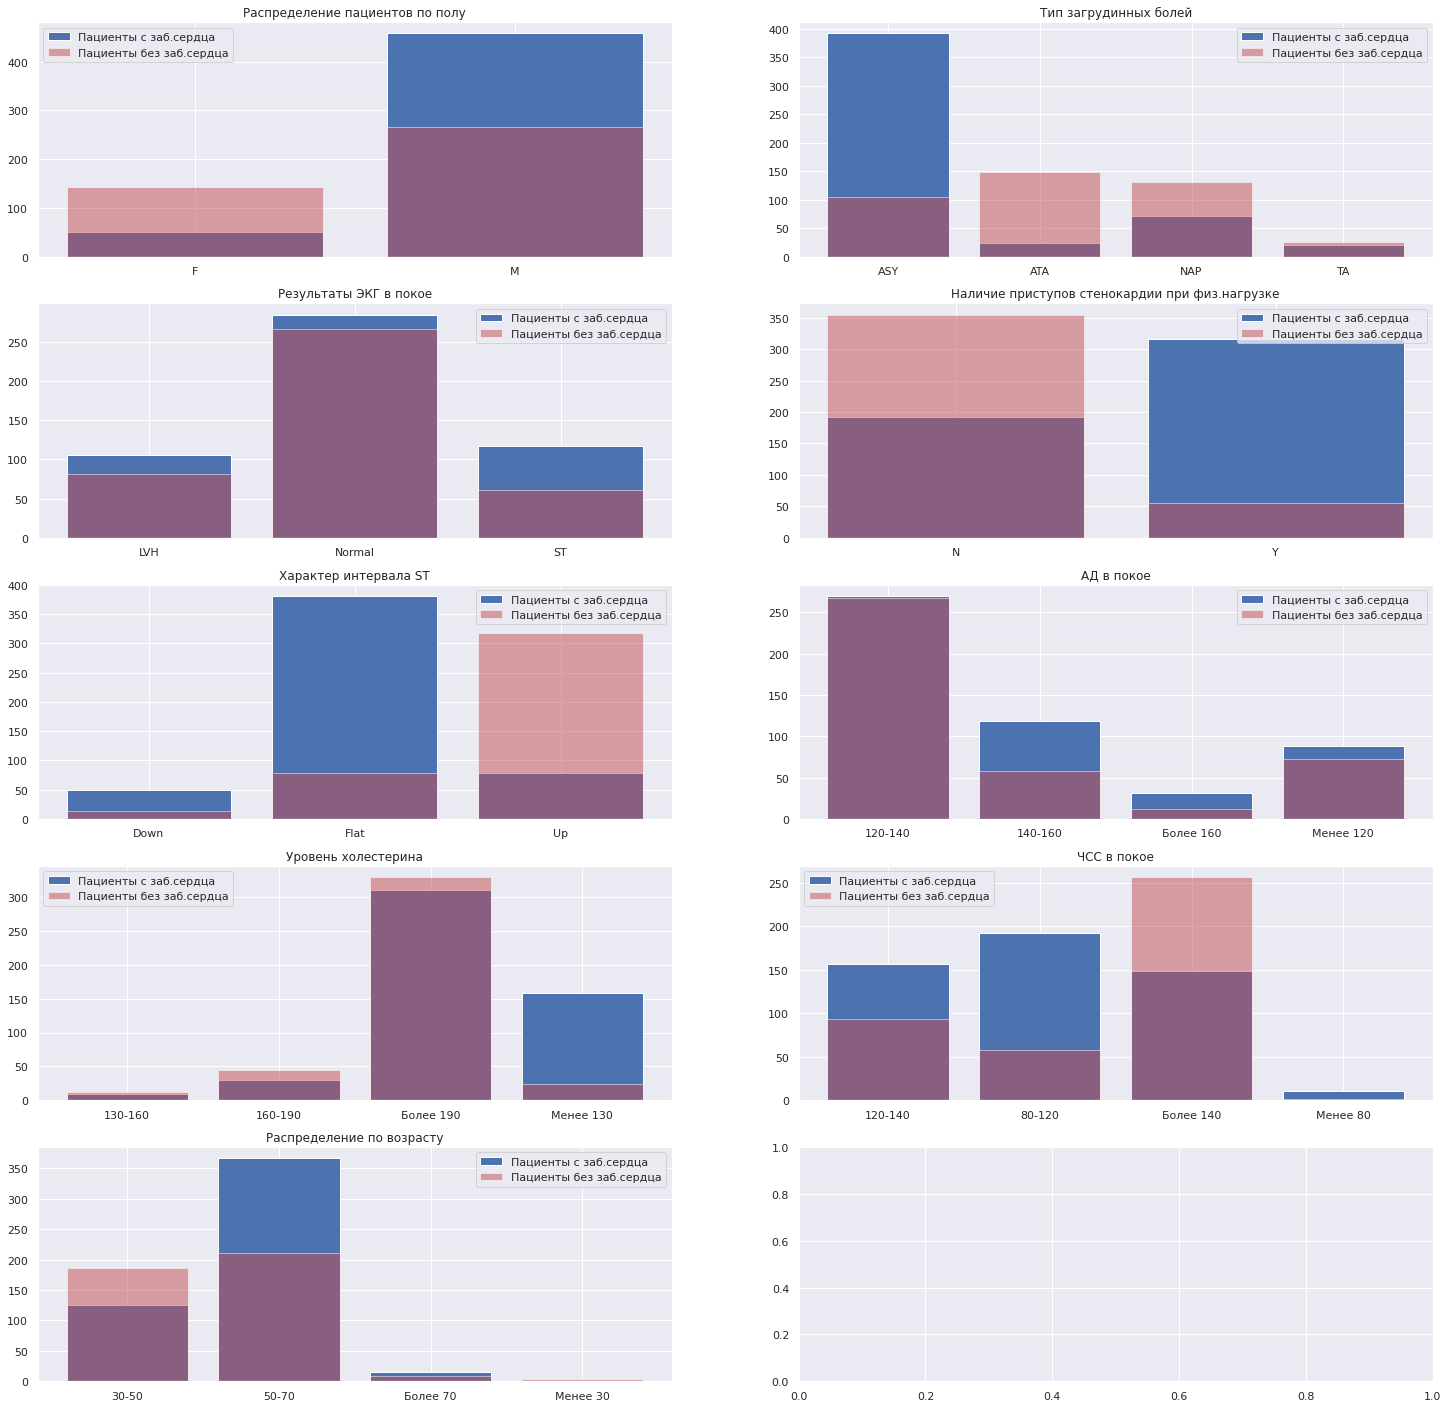

In [15]:
draw_graphs(has_heart_disease, no_heart_disease, cols_list, labels_list, titles_list)

Выводы по данным, исходя из графика:

1) В выборке как среди пациентов с заболеваниями сердца, так и среди пациентов без заболеваний сердца преобладали лица мужского пола

2) Преобладающая возрастная группа в обеих категориях - 50-70 лет

3) По типам загрудинных болей отмечается: 

а) среди пациентов с заболеваниями сердца большинство имели бессимптомное течение стенокардии, на 2-м месте - атипичная боль нестенокардитического характера, на 3-м месте - типичная стенокардитическая боль, на 4-м - атипичная стенокардитическая боль

б) среди пациентов без заболеваний сердца большинство имели атипичную стенокардитическую боль, на 2-м месте - боли нестенокардитического характера, на 3-м месте - отсутствие симптомов стенокардии, на 4-м месте - типичные для стенокардии боли загрудинного характера

4) Уровень холестерина: как в основной (с заб.сердца), так и в контрольной (без з.с.) группах у преобладающего количества пациентов уровень холестерина оказался повышенным - более 190 ЕД, при этом у большого количества пациентов основной группы отмечались нормальные или слабо повышенные уровни холестерина (менее 130 ЕД). 

5) ST-сегмент (повышение или понижение данного сегментаа на ЭКГ может свидетельствовать об ишемии миокарда - примеч.): у большинства пациентов основной группы он оказался плоским (на изолинии - свидетельствует об отсутствии ишемии), хотя у большого количества пациентов контрольной группы он был повышенным. 

6) Наличие приступов стенокардии при ФН: у большинства пациентов основной группы отмечалось появление приступов стенокардии при ФН. Вполне предсказуемо, у большинства пациентов контрольной группы приступов СН при ФН не отмечалось. Однако примечательно наличие приступов стенокардии при ФН у небольшого количества пациентов контрольной группы.

NB! Анализ графиков показывает отсутствие четкой корреляции между типами загрудинных болей, уровнем холестерина, состоянием ST-сегмента ЭКГ (пп. 3-5), наличием повышенного АД у пациентов основной группы, хотя такая корреляция достоверно подтверждена множеством исследований. Половозрастная структура пациентов также неоднородна. В связи с этим возникают вопросы относительно того, каким образом происходило разделение пациентов на основную (с наличием стенокардии) и контрольную (без стенокардии) группы. Также такие параметры как нормальные величины АД, отсутствие клинических проявлений СН, наличие близких к нормальным уровней холестерина у значительной части пациентов основной группы может говорить о том, что пациенты с заболеваниями сердца в данной выборке получали соответствующую лекарственную терапию (кардиотоническую, антиангинальную, гипотензивную и т.д.). Напротив, в группе пациентов без з.с. отмечается большое количество людей с повышенным уровнем холестерина, с наличием приступов стенокардии (как типичных, так и атипичных), а также с изменениями ЭКГ, характерными для ишемии миокарда. Всё это ограничивает информативность и значимость признаков, приведенных в датасете, для достоверного разделения пациентов на лиц, страдающих стенокардией и условно здоровых. Т.е. я считаю, что данный датасет не является информативным, данные в нем контаминированы (biased), разделение на 2 группы произведено неудовлетворительно. Следовательно, обучение модели на данном датасете не приведет к получению валидных результатов (может быть использован в целях обучения студентов, но совершенно неприемлем в практическом плане). Прочитав отдельные комментарии к данному датасету, я понял, что не у меня одного возникло такое мнение. 

In [16]:
# heart_data.head()

Подготовьте датасет к обучению моделей.

Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [17]:
X_data = pd.get_dummies(heart_data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']).drop('HeartDisease', axis=1)
X_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [18]:
y_data = heart_data['HeartDisease']

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

Обучите дерево решений на обучающем множестве. Используйте следующие модели: 

a) tree.DecisionTreeClassifier 

b) ensemble.RandomForestClassifier 

Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report. 

Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [20]:
dt_model = DecisionTreeClassifier(max_depth=9, min_samples_split=3, min_samples_leaf=10, random_state=42)

In [21]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=3,
                       random_state=42)

In [22]:
dt_predictions = dt_model.predict(X_test)

In [23]:
dt_model.score(X_train, y_train)

0.8801089918256131

In [24]:
dt_model.score(X_test, y_test)

0.8695652173913043

In [25]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=150,
                                  max_depth=6,
                                  max_samples=0.5,
                                  max_features=0.5)

In [26]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.5, max_samples=0.5,
                       n_estimators=150, random_state=42)

In [27]:
rf_predictions = rf_model.predict(X_test)

In [28]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9237057220708447
0.875


In [29]:
dt_metrics = c_rep(y_test, dt_predictions)
rf_metrics = c_rep(y_test, rf_predictions)

In [30]:
print(dt_metrics)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [31]:
print(rf_metrics)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



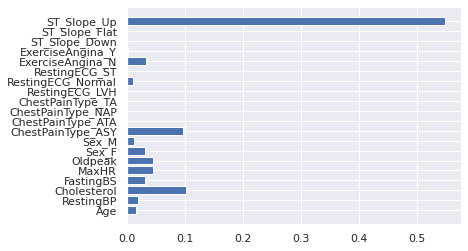

In [32]:
dt_model1 = DecisionTreeClassifier(max_depth=9, min_samples_split=3, min_samples_leaf=10, random_state=42)
dt_model1.fit(X_data, y_data)
plt.barh(y=np.arange(len(dt_model1.feature_importances_)), width=dt_model1.feature_importances_)
plt.yticks(np.arange(len(X_data.columns)), X_data.columns)
plt.show()

In [33]:
dt_dataframe = pd.DataFrame([X_data.columns, dt_model1.feature_importances_], ['Параметры', 'Важность']).T

In [34]:
dt_dataframe.sort_values('Важность', ascending=False, inplace=True)

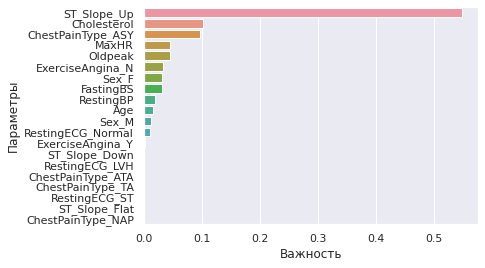

In [35]:
sns.barplot(data=dt_dataframe, y=dt_dataframe['Параметры'], x=dt_dataframe['Важность'], orient='horizontal');

In [36]:
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X_data, y_data)
rf_dataframe = pd.DataFrame([X_data.columns, rf_model1.feature_importances_], ['Параметры', 'Важность']).T
rf_dataframe.sort_values('Важность', ascending=False, inplace=True)

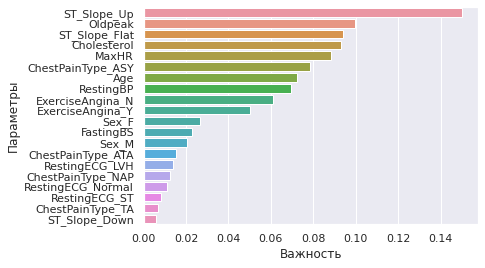

In [37]:
sns.barplot(data=rf_dataframe, y=rf_dataframe['Параметры'], x=rf_dataframe['Важность'], orient='horizontal');

Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier. 

a) Повторите п. 5 Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. 

In [38]:
model_bagging = BaggingClassifier(DecisionTreeClassifier(),
                                  n_estimators=100,
                                  max_samples=0.5,
                                  max_features=0.5,
                                  random_state=42)

In [39]:
model_bagging.fit(X_train, y_train)
model_bagging.score(X_train, y_train)

0.9632152588555858

In [40]:
model_bagging_predictions = model_bagging.predict(X_test)

In [41]:
model_bagging.score(X_test, y_test)

0.8641304347826086

In [42]:
bagging_metrics = c_rep(y_test, model_bagging_predictions)
print(bagging_metrics)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



Используйте ensemble.StackingClassifier. 

a) Повторите п. 5

In [43]:
stacking_classifier = StackingClassifier(
    [
      ('LinearRegression', LinearRegression()),
      ('KNeighborsClassifier', KNeighborsClassifier()),
      ('DecisionTreeClassifier', DecisionTreeClassifier())
    ],
    RidgeClassifierCV([8,14,10])
)

In [44]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('LinearRegression', LinearRegression()),
                               ('KNeighborsClassifier', KNeighborsClassifier()),
                               ('DecisionTreeClassifier',
                                DecisionTreeClassifier())],
                   final_estimator=RidgeClassifierCV(alphas=[8, 14, 10]))

In [45]:
stacking_classifier_predictions = stacking_classifier.predict(X_test)

In [46]:
stacking_classifier.score(X_train, y_train)

0.9019073569482289

In [47]:
stacking_classifier.score(X_test, y_test)

0.8695652173913043

In [48]:
stacking_classifier.final_estimator_.get_params()

{'alphas': [8, 14, 10],
 'class_weight': None,
 'cv': None,
 'fit_intercept': True,
 'scoring': None,
 'store_cv_values': False}

In [49]:
for i in stacking_classifier.named_estimators:
  print(f'Score on train with model {i} : {stacking_classifier.named_estimators_[i].score(X_train, y_train)}')
  print(f'Score on test with model {i} : {stacking_classifier.named_estimators_[i].score(X_test, y_test)}')

Score on train with model LinearRegression : 0.5826525384883001
Score on test with model LinearRegression : 0.5300387934563549
Score on train with model KNeighborsClassifier : 0.7970027247956403
Score on test with model KNeighborsClassifier : 0.7065217391304348
Score on train with model DecisionTreeClassifier : 1.0
Score on test with model DecisionTreeClassifier : 0.8043478260869565


In [50]:
stacking_metrics = c_rep(y_test, stacking_classifier_predictions)
print(stacking_metrics)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Сформулируйте выводы по проделанной работе.

a) Сравните метрики построенных моделей.

b) Напишите свое мнение, какая модель наилучшая и почему.

Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.

Выводы: 

а) При анализе метрик моделей DecisionTree, RandomForest, Bagging, Stacking наилучший результат (совместный - трен. + тестовые данные) показала модель BaggingClassifier - 96,3 и 86,4%. Если оценивать результат на тестовых данных, то лучшую точность показал RandomForestClassifier - 87,5%. 

б) Ансамблирование является хорошим инструментом повышения точности классификации и регрессии, показывает более хорошие результаты по сравнению с изолированными моделями машинного обучения (модели линейной регрессии, дерева решений, K-nearest neighbors итд.)



***Однако для меня осталось непонятным, почему показатели важности параметров оказались настолько различными при использовании DecisionTree и RandomForest (см. гистограммы выше). Важность параметров при использовании двух этих моделей оказалась различной как по количественному, так и по порядковому признакам (за исключением параметра ST_slope_up, который оказался наиболее важным в обеих моделях).***